In [ ]:
!pip install gdown

In [ ]:
!gdown --id 1u0dbPmP7f_mtIYfd7uOwxib9J-hI8NiU

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1u0dbPmP7f_mtIYfd7uOwxib9J-hI8NiU
From (redirected): https://drive.google.com/uc?id=1u0dbPmP7f_mtIYfd7uOwxib9J-hI8NiU&confirm=t&uuid=fee15848-7189-4f97-b3b6-f73e70bae4e6
To: /content/waste-resized.zip
100% 42.8M/42.8M [00:00<00:00, 45.3MB/s]


In [ ]:
!unzip waste-resized.zip

Archive:  waste-resized.zip
   creating: waste-resized/test/
   creating: waste-resized/test/cardboard/
  inflating: waste-resized/test/cardboard/cardboard161.jpg  
  inflating: waste-resized/test/cardboard/cardboard162.jpg  
  inflating: waste-resized/test/cardboard/cardboard163.jpg  
  inflating: waste-resized/test/cardboard/cardboard164.jpg  
  inflating: waste-resized/test/cardboard/cardboard165.jpg  
  inflating: waste-resized/test/cardboard/cardboard166.jpg  
  inflating: waste-resized/test/cardboard/cardboard167.jpg  
  inflating: waste-resized/test/cardboard/cardboard168.jpg  
  inflating: waste-resized/test/cardboard/cardboard169.jpg  
  inflating: waste-resized/test/cardboard/cardboard17.jpg  
  inflating: waste-resized/test/cardboard/cardboard170.jpg  
  inflating: waste-resized/test/cardboard/cardboard171.jpg  
  inflating: waste-resized/test/cardboard/cardboard172.jpg  
  inflating: waste-resized/test/cardboard/cardboard173.jpg  
  inflating: waste-resized/test/cardboard/c

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "waste-resized/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "waste-resized/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "waste-resized/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 1772 files belonging to 6 classes.
Found 252 files belonging to 6 classes.
Found 505 files belonging to 6 classes.


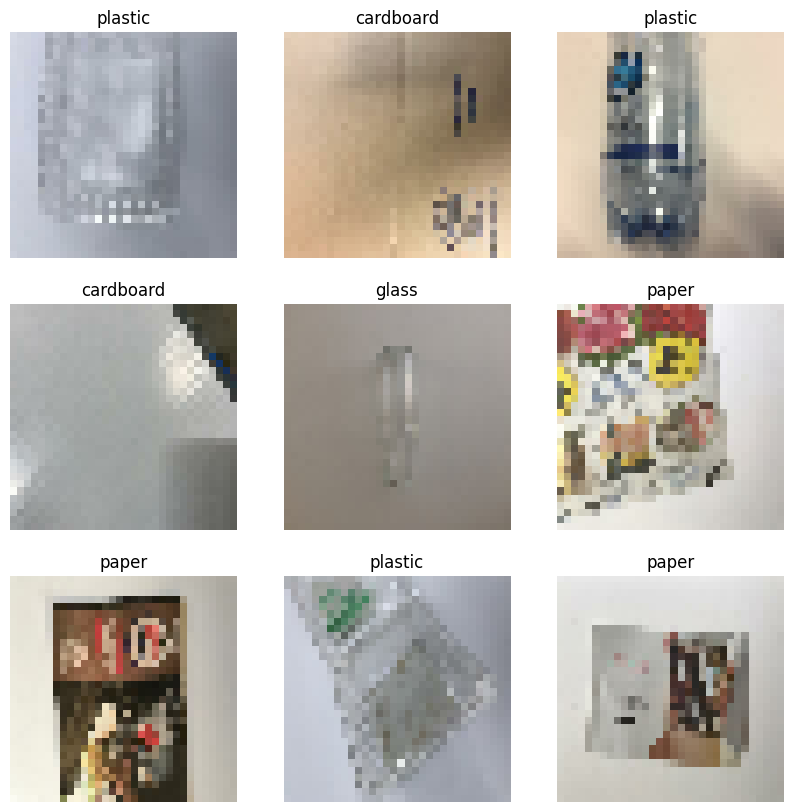

In [ ]:
class_names = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6)
])

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
89/89 [==============================] - 8s 22ms/step - loss: 1.6968 - accuracy: 0.2777 - val_loss: 1.6223 - val_accuracy: 0.3016
Epoch 2/10
89/89 [==============================] - 2s 25ms/step - loss: 1.5855 - accuracy: 0.3397 - val_loss: 1.5511 - val_accuracy: 0.3175
Epoch 3/10
89/89 [==============================] - 2s 17ms/step - loss: 1.4604 - accuracy: 0.4142 - val_loss: 1.5382 - val_accuracy: 0.3849
Epoch 4/10
89/89 [==============================] - 2s 16ms/step - loss: 1.4578 - accuracy: 0.4091 - val_loss: 1.4095 - val_accuracy: 0.4286
Epoch 5/10
89/89 [==============================] - 2s 17ms/step - loss: 1.3106 - accuracy: 0.4746 - val_loss: 1.3956 - val_accuracy: 0.4444
Epoch 6/10
89/89 [==============================] - 2s 18ms/step - loss: 1.2539 - accuracy: 0.5119 - val_loss: 1.3305 - val_accuracy: 0.4365
Epoch 7/10
89/89 [==============================] - 2s 16ms/step - loss: 1.2286 - accuracy: 0.5260 - val_loss: 1.3489 - val_accuracy: 0.4563
Epoch 8/10
89

In [ ]:
model.evaluate(test_ds)

26/26 [==============================] - 1s 16ms/step - loss: 1.4076 - accuracy: 0.5188


[1.4075850248336792, 0.5188118815422058]

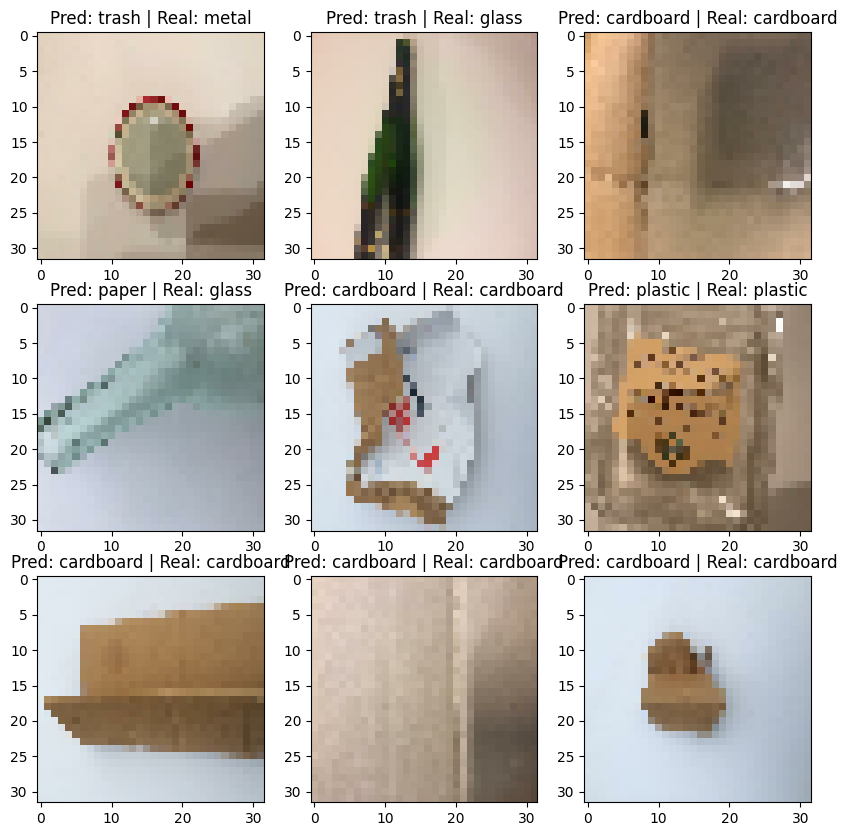

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
num_classes = 6
train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(y, num_classes)))
val_ds = val_ds.map(lambda x, y: (x, tf.one_hot(y, num_classes)))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
89/89 [==============================] - 8s 37ms/step - loss: 1.6084 - accuracy: 0.5547 - val_loss: 1.0739 - val_accuracy: 0.5952
Epoch 2/10
89/89 [==============================] - 2s 21ms/step - loss: 0.6375 - accuracy: 0.7833 - val_loss: 0.9915 - val_accuracy: 0.6508
Epoch 3/10
89/89 [==============================] - 2s 21ms/step - loss: 0.4015 - accuracy: 0.8747 - val_loss: 1.0264 - val_accuracy: 0.6627
Epoch 4/10
89/89 [==============================] - 3s 33ms/step - loss: 0.2739 - accuracy: 0.9193 - val_loss: 1.0559 - val_accuracy: 0.6667
Epoch 5/10
89/89 [==============================] - 2s 20ms/step - loss: 0.1753 - accuracy: 0.9498 - val_loss: 1.2613 - val_accuracy: 0.6230
Epoch 6/10
89/89 [==============================] - 2s 21ms/step - loss: 0.1362 - accuracy: 0.9622 - val_loss: 1.3020 - val_accuracy: 0.6429
Epoch 7/10
89/89 [==============================] - 2s 21ms/step - loss: 0.0841 - accuracy: 0.9819 - val_loss: 1.1281 - val_accuracy: 0.6825
Epoch 8/10
89

In [ ]:
model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
89/89 [==============================] - 2s 21ms/step - loss: 0.0203 - accuracy: 0.9983 - val_loss: 1.4256 - val_accuracy: 0.6548
Epoch 2/10
89/89 [==============================] - 2s 21ms/step - loss: 0.0176 - accuracy: 0.9983 - val_loss: 1.3315 - val_accuracy: 0.6825
Epoch 3/10
89/89 [==============================] - 3s 30ms/step - loss: 0.0148 - accuracy: 0.9977 - val_loss: 1.3780 - val_accuracy: 0.6667
Epoch 4/10
89/89 [==============================] - 2s 21ms/step - loss: 0.0130 - accuracy: 0.9983 - val_loss: 1.5266 - val_accuracy: 0.6508
Epoch 5/10
89/89 [==============================] - 2s 21ms/step - loss: 0.0161 - accuracy: 0.9972 - val_loss: 1.4155 - val_accuracy: 0.6587
Epoch 6/10
89/89 [==============================] - 2s 22ms/step - loss: 0.0242 - accuracy: 0.9960 - val_loss: 1.4887 - val_accuracy: 0.6587
Epoch 7/10
89/89 [==============================] - 2s 25ms/step - loss: 0.1507 - accuracy: 0.9520 - val_loss: 1.8888 - val_accuracy: 0.6270
Epoch 8/10
89

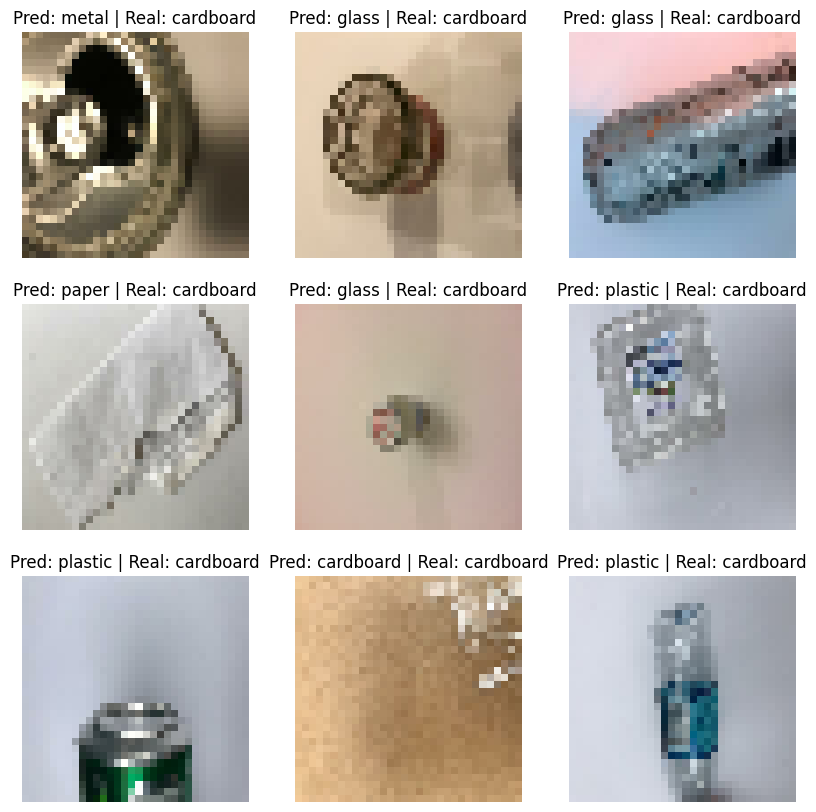

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    classifications = model(images)

    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        index = np.argmax(classifications[i])
        plt.title("Pred: " + class_names[index] + " | Real: " + class_names[np.argmax(labels[i])])
        plt.axis("off")

plt.show()